##Importing Data Set

In [ ]:
### Import Required Libraries
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#import numpy as np
import matplotlib.gridspec as gridspec


In [ ]:
### Reading dataset
data = pd.read_csv("ACME-HappinessSurvey2020.csv")

##Understanding the data

In [ ]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
print(f"Dataset Dimension: **{data.shape[0]}** rows,  **{data.shape[1]}** columns")

Dataset Dimension: **126** rows,  **7** columns


In [ ]:
data.columns.values

array(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype=object)

In [ ]:
data.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [ ]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Data Cleaning

####Create a copy of base data for manupulation & pre- processing

In [ ]:
happycustomer_data = data.copy()

In [ ]:
happycustomer_data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [ ]:
happycustomer_data = happycustomer_data.replace({'Unhappy': {0: 'Happy',1: 'Happy'}})

####Checking the unique observations and checking whether there is any duplicate columns

In [ ]:
print('Known observations: {}\nUnique observations: {}'.format(len(happycustomer_data.index),len(happycustomer_data.drop_duplicates().index)))
print("**No duplicates Found!**")

Known observations: 126
Unique observations: 110
**No duplicates Found!**


####Checking unique values found in each coloumn

In [ ]:
pd.Series({col:happycustomer_data[col].unique() for col in happycustomer_data})

Y              [0, 1]
X1       [3, 5, 4, 1]
X2    [3, 2, 4, 5, 1]
X3    [3, 2, 4, 5, 1]
X4    [4, 5, 3, 2, 1]
X5    [2, 4, 3, 5, 1]
X6    [4, 3, 5, 2, 1]
dtype: object

In [ ]:
happycustomer_data.astype('object').describe(include='all').loc['unique', :]

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
Name: unique, dtype: int64

In [ ]:
happycustomer_data.rename(columns = {'X1':'X1'}, inplace = True)
happycustomer_data.rename(columns = {'X2':'X2'}, inplace = True)
happycustomer_data.rename(columns = {'X3':'X3'}, inplace = True)
happycustomer_data.rename(columns = {'X4':'X4'}, inplace = True)
happycustomer_data.rename(columns = {'X5':'X5'}, inplace = True)
happycustomer_data.rename(columns = {'X6':'X6'}, inplace = True)

In [ ]:
happycustomer_data.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

####checking missing values in each column

In [ ]:
# Count total NaN at each column in a DataFrame
print(happycustomer_data.isnull().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


####Finding correlation between features

In [ ]:
happycustomer_data.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


###Value of 1 describes a perfect positive correlation whereas a value of –1 corresponds to a perfect negative correlation

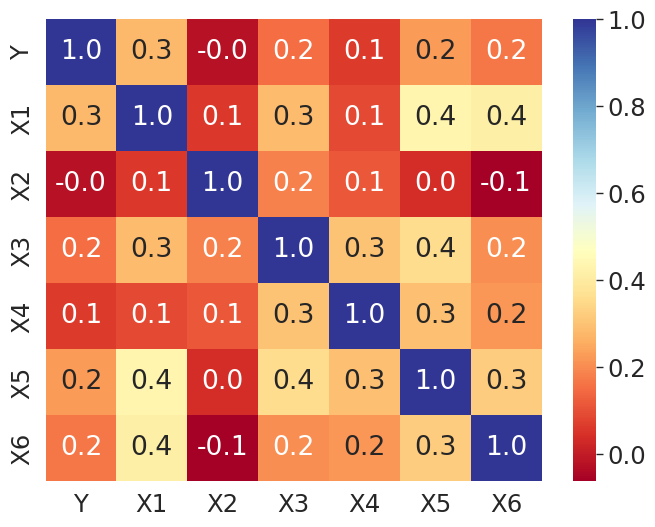

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(happycustomer_data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [ ]:
happycustomer_data.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

##Binning Nominal Features for understanding the overall trend of data

In [ ]:
def binning_feature(feature):
    plt.hist(happycustomer_data[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(happycustomer_data[feature]), max(happycustomer_data[feature]), 4)
    print("**Value Range**")

    print(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    print(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    print(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    happycustomer_data.insert(happycustomer_data.shape[1]-1,f'{feature}-binned', pd.cut(happycustomer_data[feature], bins, labels=group_names, include_lowest=True))
    display(happycustomer_data[[feature, f'{feature}-binned']].head(10))

    # count values
    print("<br>**Binning Distribution**<br>")
    display(happycustomer_data[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, happycustomer_data[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

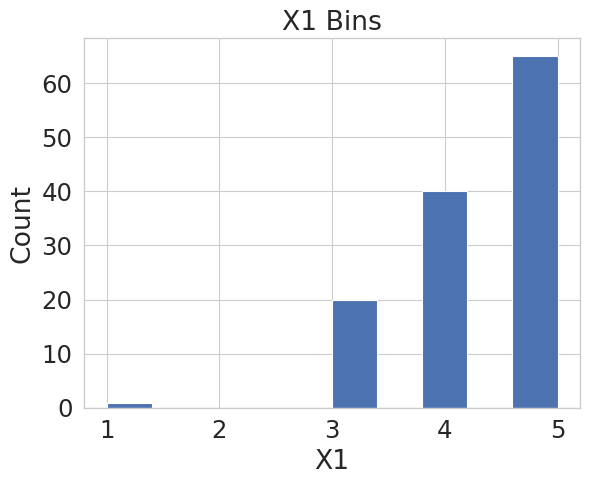

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X1,X1-binned
0,3,Medium
1,3,Medium
2,5,High
3,5,High
4,5,High
5,5,High
6,3,Medium
7,5,High
8,4,High
9,4,High


<br>**Binning Distribution**<br>


High      105
Medium     20
Low         1
Name: X1-binned, dtype: int64

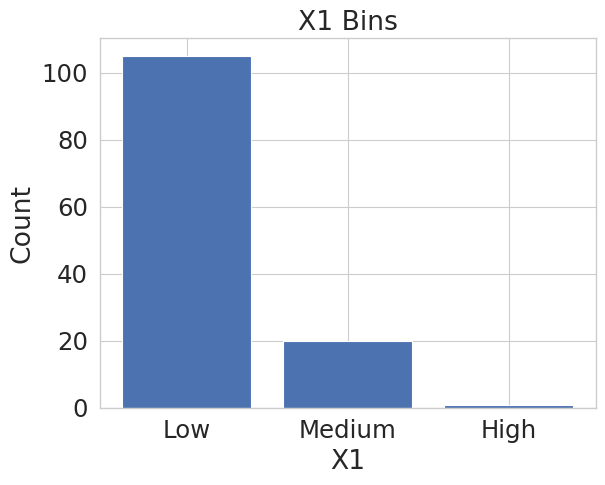

In [ ]:
binning_feature('X1')

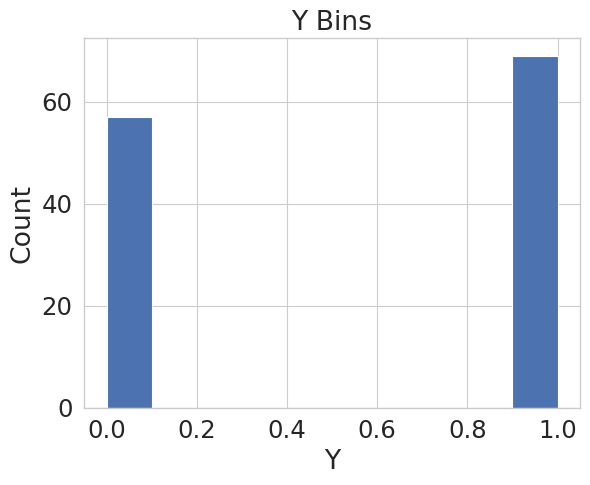

**Value Range**
Low ( 0.00 -  0.33)
Medium ( 0.33 -  0.67)
High ( 0.67 -  1.00)


,Y,Y-binned
0,0,Low
1,0,Low
2,1,High
3,0,Low
4,0,Low
5,1,High
6,0,Low
7,1,High
8,0,Low
9,0,Low


<br>**Binning Distribution**<br>


High      69
Low       57
Medium     0
Name: Y-binned, dtype: int64

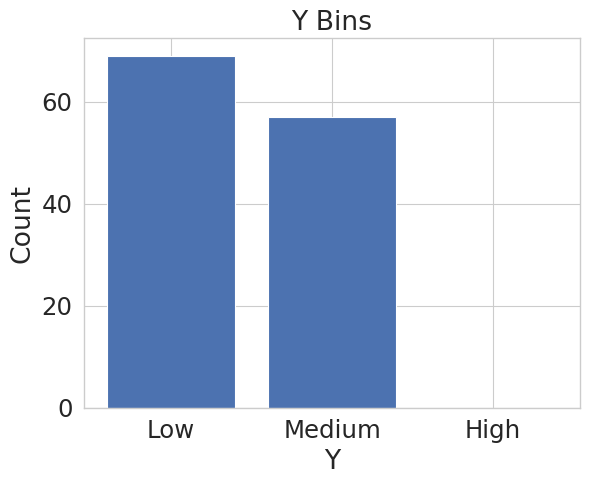

In [ ]:
binning_feature('Y')

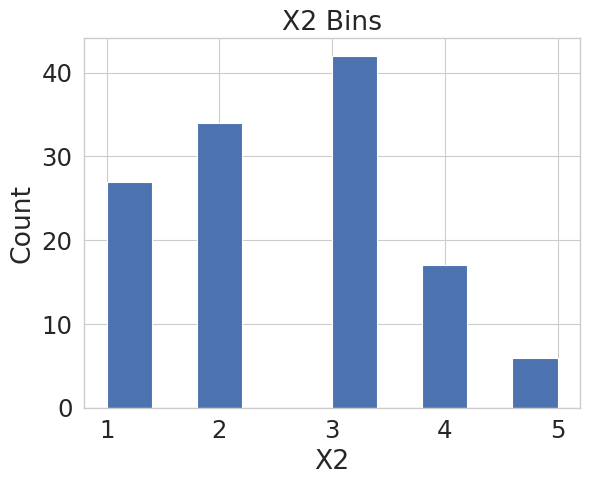

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X2,X2-binned
0,3,Medium
1,2,Low
2,3,Medium
3,4,High
4,4,High
5,5,High
6,1,Low
7,4,High
8,1,Low
9,4,High


<br>**Binning Distribution**<br>


Low       61
Medium    42
High      23
Name: X2-binned, dtype: int64

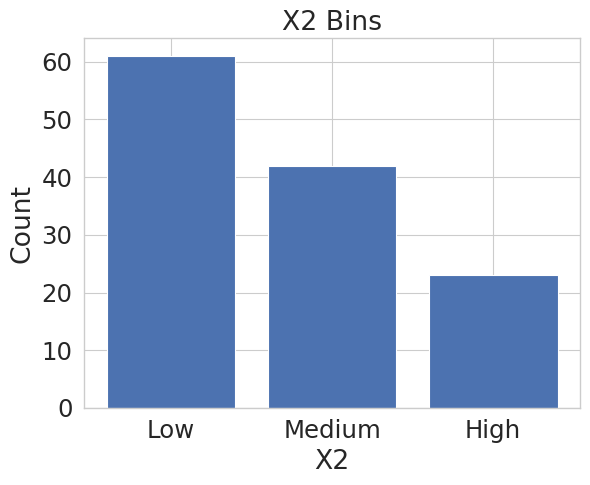

In [ ]:
binning_feature('X2')

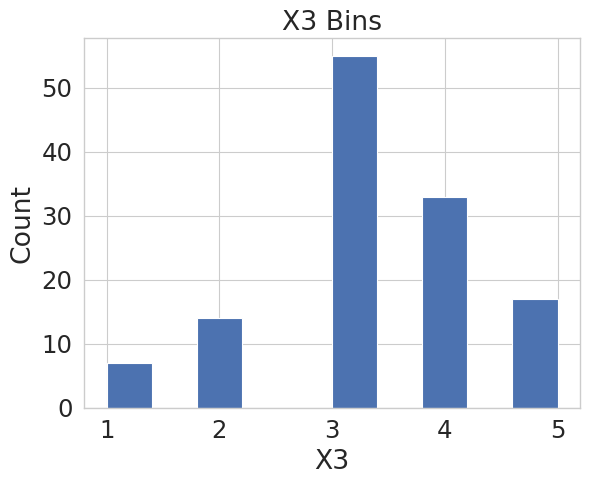

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X3,X3-binned
0,3,Medium
1,3,Medium
2,3,Medium
3,3,Medium
4,3,Medium
5,3,Medium
6,2,Low
7,4,High
8,4,High
9,4,High


<br>**Binning Distribution**<br>


Medium    55
High      50
Low       21
Name: X3-binned, dtype: int64

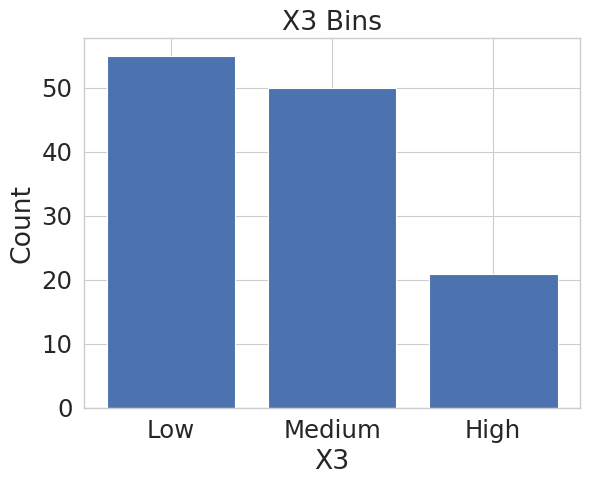

In [ ]:
binning_feature('X3')

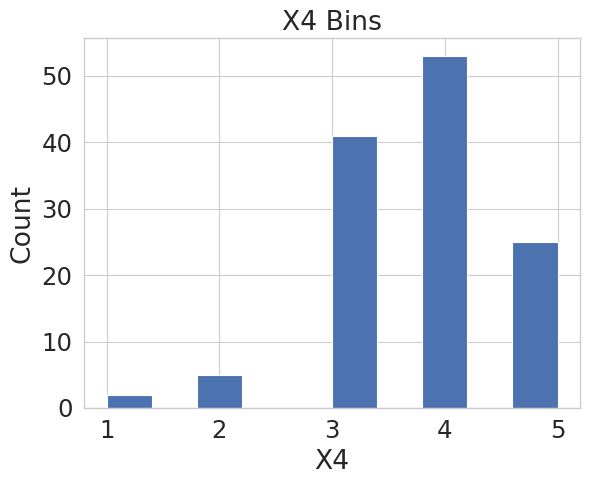

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X4,X4-binned
0,4,High
1,5,High
2,3,Medium
3,3,Medium
4,3,Medium
5,5,High
6,2,Low
7,4,High
8,4,High
9,2,Low


<br>**Binning Distribution**<br>


High      78
Medium    41
Low        7
Name: X4-binned, dtype: int64

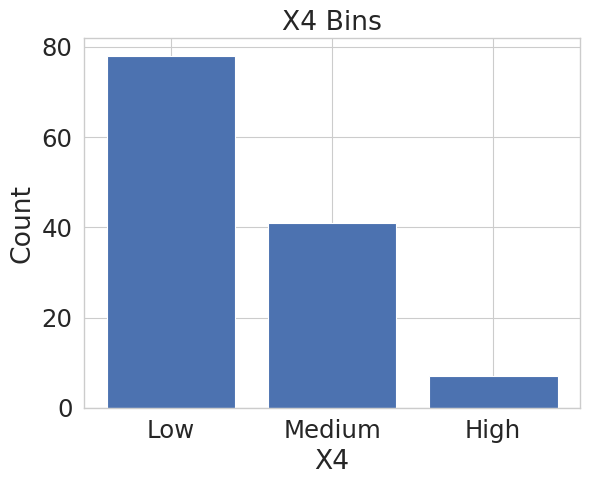

In [ ]:
binning_feature('X4')

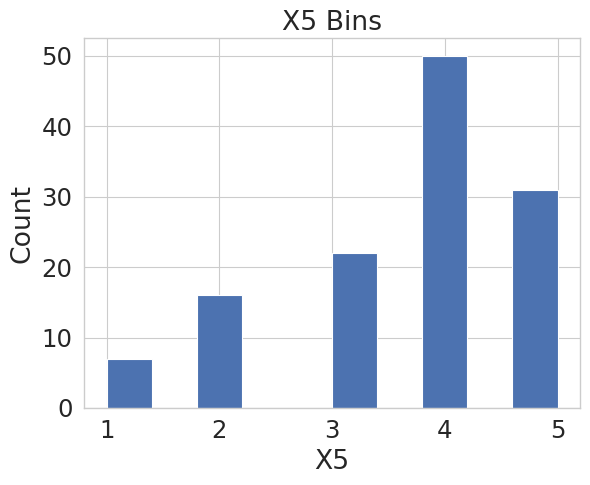

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X5,X5-binned
0,2,Low
1,4,High
2,3,Medium
3,3,Medium
4,3,Medium
5,5,High
6,1,Low
7,4,High
8,4,High
9,5,High


<br>**Binning Distribution**<br>


High      81
Low       23
Medium    22
Name: X5-binned, dtype: int64

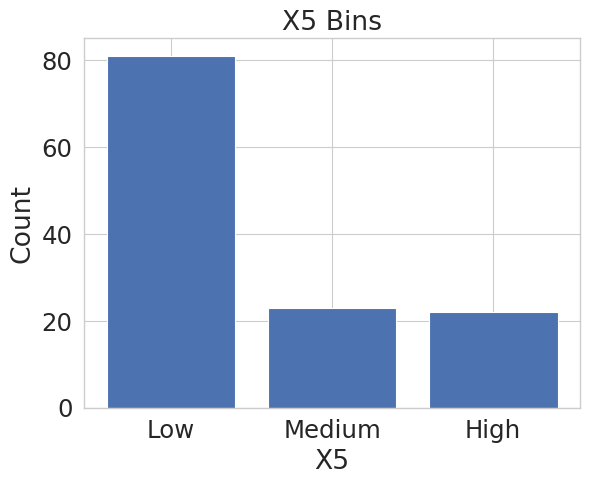

In [ ]:
binning_feature('X5')

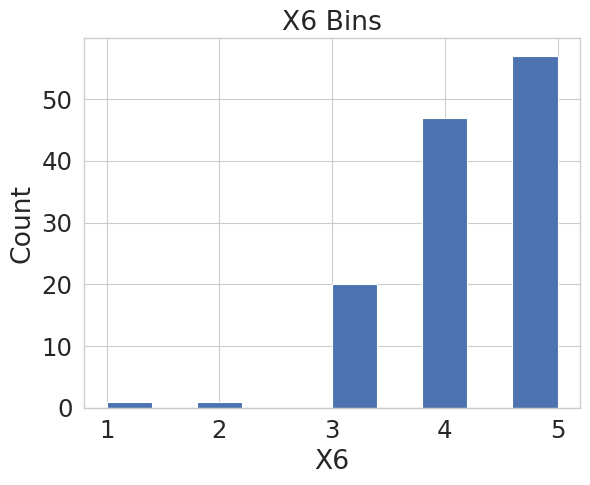

**Value Range**
Low ( 1.00 -  2.33)
Medium ( 2.33 -  3.67)
High ( 3.67 -  5.00)


,X6,X6-binned
0,4,High
1,3,Medium
2,5,High
3,5,High
4,5,High
5,5,High
6,3,Medium
7,5,High
8,4,High
9,5,High


<br>**Binning Distribution**<br>


High      104
Medium     20
Low         2
Name: X6-binned, dtype: int64

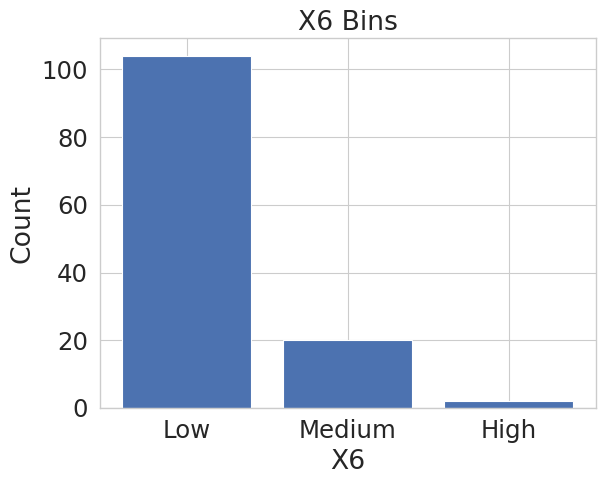

In [ ]:
binning_feature('X6')

#Data Visualization

## 1. General EDA for understanding the trend of data

In [ ]:
happycustomer_data['Y']=happycustomer_data['Y'].values.astype('str')
print(happycustomer_data.dtypes)


Y              object
X1              int64
X2              int64
X3              int64
X4              int64
X5              int64
X1-binned    category
Y-binned     category
X2-binned    category
X3-binned    category
X4-binned    category
X5-binned    category
X6-binned    category
X6              int64
dtype: object


In [ ]:
def plot_target_dist(happycustomer_data):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(happycustomer_data.Y.value_counts(),labels = ['Unhappy', 'Happy'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Unhappy Customers Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(happycustomer_data.Y)
    t.set_xlabel('Y', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Unhappy Customers Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

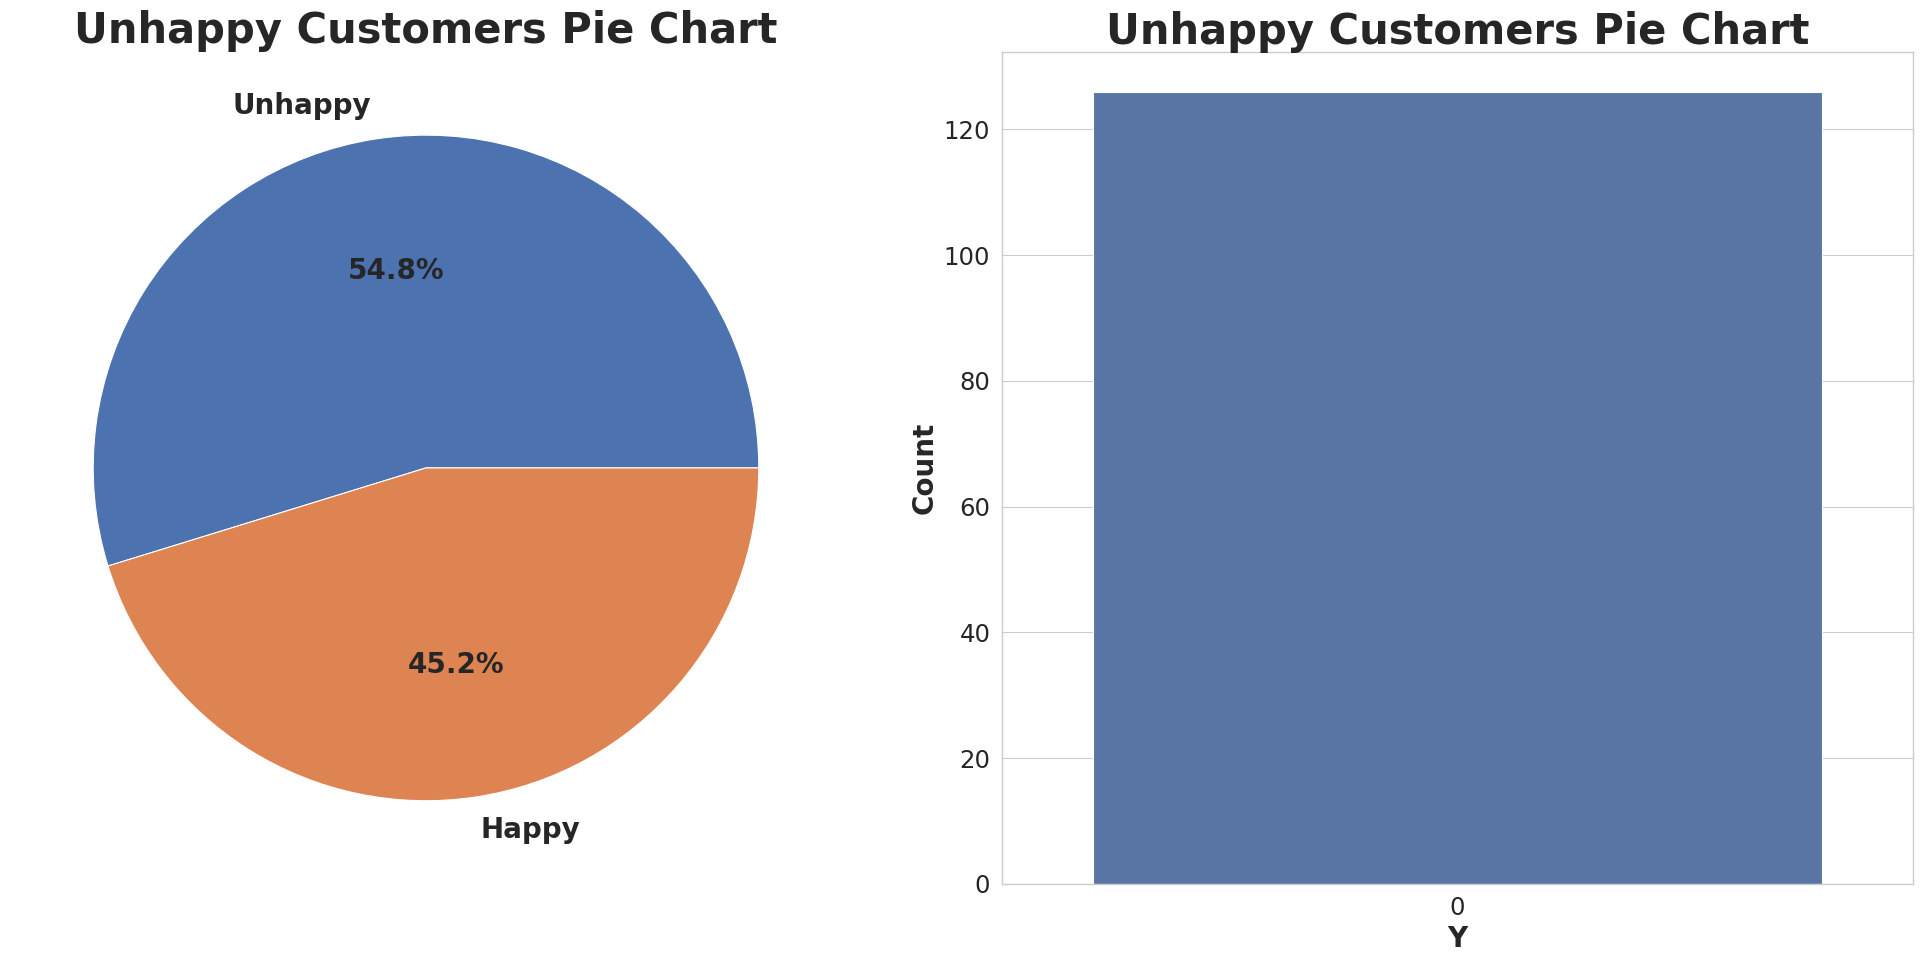

In [ ]:
plot_target_dist(happycustomer_data)

In [ ]:
data.columns.values

array(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype=object)

##Finding Outilers using Boxplot



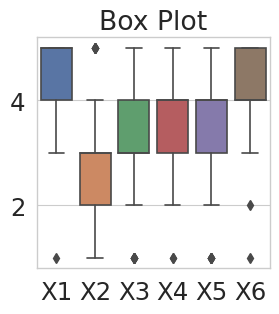

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(data=happycustomer_data[['Y','X1','X2','X3','X4','X5','X6']])
plt.title('Box Plot')
plt.show()

In [ ]:
data.columns.values

array(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype=object)

##Distribution of data for all numerical attributes



<ipython-input-85-295bf1c47ded>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=5.0)


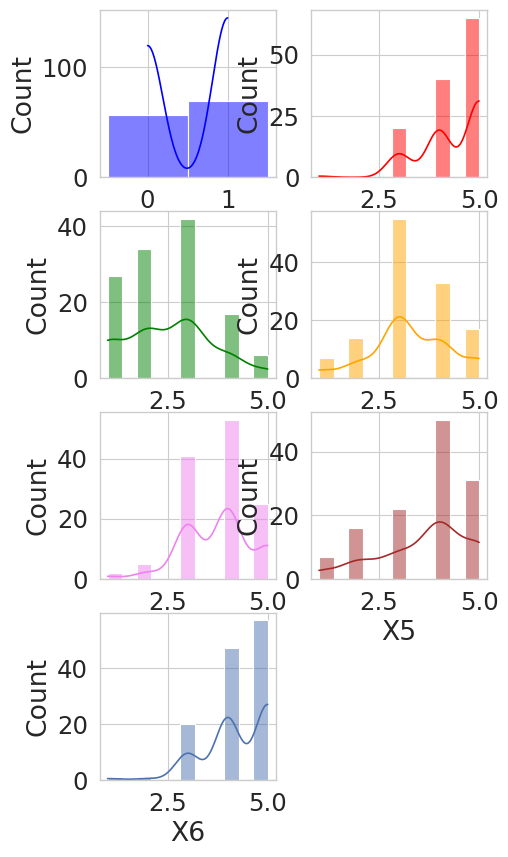

In [ ]:
# create subplots
fig = plt.figure(figsize=(5,10))

# Create histograms using seaborn
plt.subplot(4,2,1)
sns.histplot(data=happycustomer_data, x='Y', color='blue',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,2)
sns.histplot(data=happycustomer_data, x='X1', color='red',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,3)
sns.histplot(data=happycustomer_data, x='X2', color='green',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,4)
sns.histplot(data=happycustomer_data, x='X3', color='orange',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,5)
sns.histplot(data=happycustomer_data, x='X4', color='violet',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,6)
sns.histplot(data=happycustomer_data, x='X5', color='brown',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,7)
sns.histplot(data=happycustomer_data, x='X6',kde=True)
plt.ylabel('Count')

#Abjust spacing between subplots
fig.tight_layout(pad=5.0)

# Show the plots
plt.show()



In [ ]:
correlation = data=happycustomer_data[['Y', 'X1',
                 'X3', 'X4',
                 'X5', 'X6']].corr()
correlation

<ipython-input-86-443ea034f9a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'X5', 'X6']].corr()


,X1,X3,X4,X5,X6
X1,1.000000,0.283358,0.087541,0.432772,0.411873
X3,0.283358,1.000000,0.302618,0.358397,0.203750
X4,0.087541,0.302618,1.000000,0.293115,0.215888
X5,0.432772,0.358397,0.293115,1.000000,0.320195
X6,0.411873,0.203750,0.215888,0.320195,1.000000


<ipython-input-87-57d21d88324a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happycustomer_data.corr(), annot = True, fmt = ".2f", linewidth = .7)


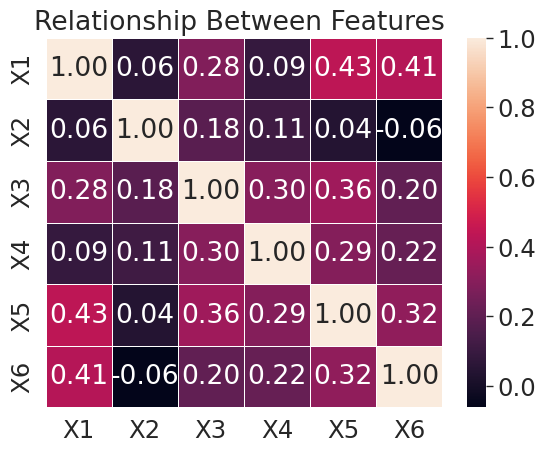

In [ ]:
sns.heatmap(happycustomer_data.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

<ipython-input-88-8072a719993e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(happycustomer_data.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(7,7))


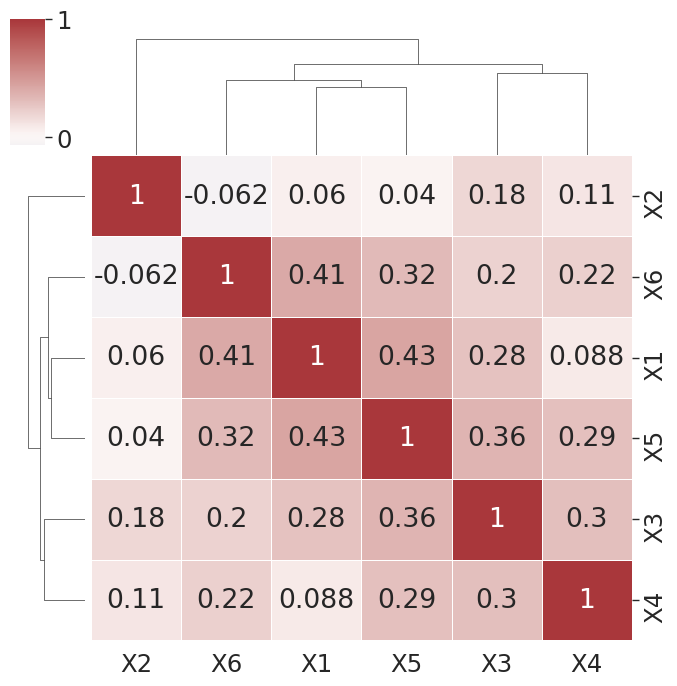

In [ ]:
sns.clustermap(happycustomer_data.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(7,7))
plt.show()